## Лабораторна робота №3.
***Data Pre-Processing***

Оцінювання даної роботи буде ураховувати якість ваших візуалізацій (вони можуть незначно відрізнятися від прикладів, але повинні змістовно відображати суть задачі) та опис отриманих вами результатів. При наявності ЛИШЕ візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.

Під час виконання вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації. 

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.

Для виконання цієї лабораторної роботи Вам необхідно скористатися вибіркою [titanic.csv](https://gist.github.com/michhar/2dfd2de0d4f8727f873422c5d959fff5).  
Цей датасет ви вже використовували в лабораторній роботі №1 ;)  
  
  ```NB:побудовані графіки та гістограми мають бути змістовними і візуально зрозумілими.``` 

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
sns.set_context('talk')

***Завдання 1.*** Перед початком роботи з будь яким датасетом, необхідно:  
- завантажити датасет;  
- вивести основну статистичну інформацію по числовим змінним;
- вивести розмірність датасету;
- перевірити типи змінних і кількість данних по кожній змінній.

In [8]:
df = pd.read_csv("titanic.csv")
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


***Завдання 2.*** Визначити кількість пропущених значень по кожному атрибуту

In [4]:
missing_values = df.isnull().sum()
print(missing_values)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Ваші висновки:

***Завдання 3:*** Побудувати матрицю кореляції 



1.   Вирахувати кореляційні коефіціенти для набору данних за методом Пірсона
2.   Відобразити отриману матрицю коефіціентів у вигляді теплокарти

3. Описати отримані результати, спираючись на значення коефіціентів кореляції



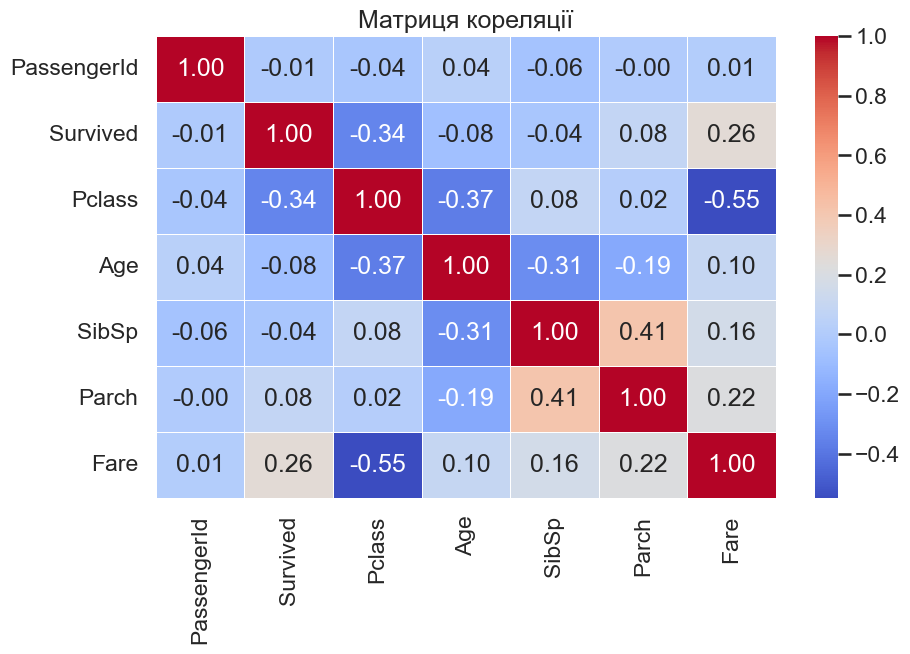

In [5]:
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Матриця кореляції")
plt.show()

Ваші висновки:

**Завдання 4:** Як ви могли помітити, у нашому датесеті досить багато пропущених значень, зокрема у атрибута віку пасажирів. Робота з такими даними впливае як на результат моделювання так і на загалом уявлення цілісної картини про дані. Тож для того, що позбавитися пропусків ми використаємо заповнення пропущених значень медіаною за групами.



1.   Напишіть функцію, що на вхід приймає датафрейм, назву колонки з пропущеними значеннями та список групуючих колонок та повертає датафрейм з заповненими пропущеними значеннями
2.   Наведіть приклад роботи функції та зробіть перевірку на пропущені значення (дивись **завдання 2**)



In [6]:
def fill_missing_by_median(df, column, groupby_columns):
    """
    Заповнює пропущені значення у вказаному стовпці медіаною, обчисленою за групами.

    :param df: DataFrame, у якому проводиться заповнення
    :param column: Назва стовпця з пропущеними значеннями
    :param groupby_columns: Список стовпців, за якими групуються дані для обчислення медіани
    :return: DataFrame з заповненими значеннями
    """
    df[column] = df.groupby(groupby_columns)[column].transform(lambda x: x.fillna(x.median()))
    return df

# Використання функції для заповнення пропусків у стовпці 'Age', групуючи за 'Pclass' і 'Sex'
df_filled = fill_missing_by_median(df, "Age", ["Pclass", "Sex"])

# Перевірка кількості пропущених значень після заповнення
print(df_filled.isnull().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Ваші висновки:

 
***Завдання 5:*** В моделях машинного навчання інснує велика проблема опрацювання безперервних змінних. Потрібно перетворити безперервні значення в категоріальні. 

Максимальний вік пасажира - ```80 років```.

Отже, давайте розділимо діапазон від ```0 до 80``` на ```5``` осередків. 


Додайте до нашого датасету нову колонку ```Age_bin```, в якій будуть значення ```0, 1, 2, 3, 4```відповідно кожній віковій групі.

Побудуйте графік, який відображає кількість виживших у кожній віковій категорії.





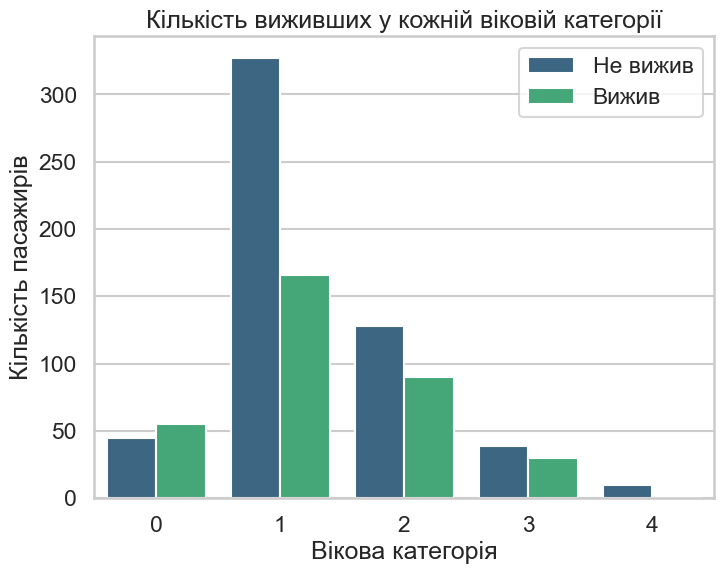

In [7]:
df_filled["Age_bin"] = pd.cut(df_filled["Age"], bins=[0, 16, 32, 48, 64, 80], labels=[0, 1, 2, 3, 4])

plt.figure(figsize=(8, 6))
sns.countplot(x="Age_bin", hue="Survived", data=df_filled, palette="viridis")
plt.title("Кількість виживших у кожній віковій категорії")
plt.xlabel("Вікова категорія")
plt.ylabel("Кількість пасажирів")
plt.legend(["Не вижив", "Вижив"])
plt.show()


Ваші висновки:

***Завдання 6:*** Так як змінна ```fare``` також є неперервною її треба закодувати до ```порядкової шкали``` 
Для цього скоритайтесь функцією ```pandas.qcut```.
[pandas.qcut](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html)  
- необхідно перевірити, чи є вірною гіпотеза про те, що кількість виживших пасажирів для квартильних значеннь змінної ```fare``` відрізняється, та чи доцільно використовувати кодування на цю змінну(для подальшої роботи з закодованою фичею)

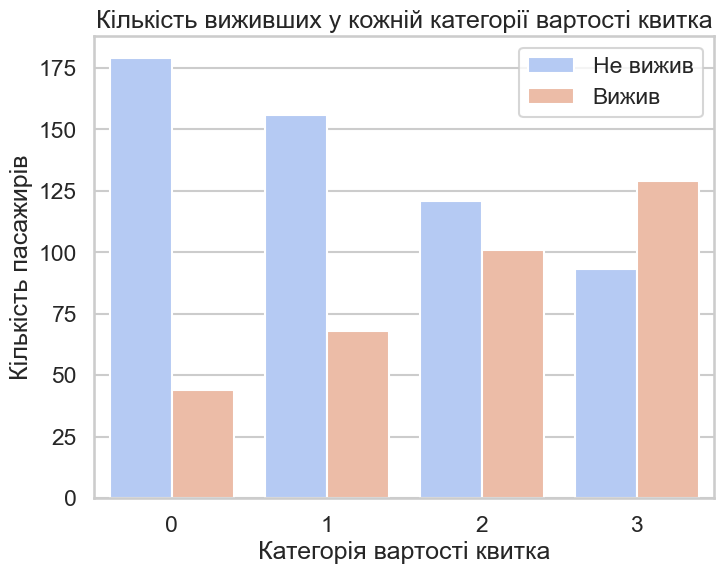

Частка виживших для кожного рівня Fare_bin:
Survived         0         1
Fare_bin                    
0         0.802691  0.197309
1         0.696429  0.303571
2         0.545045  0.454955
3         0.418919  0.581081


C:\Users\psycho\AppData\Local\Temp\ipykernel_16336\738481959.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_counts = df_filled.groupby("Fare_bin")["Survived"].value_counts(normalize=True).unstack()


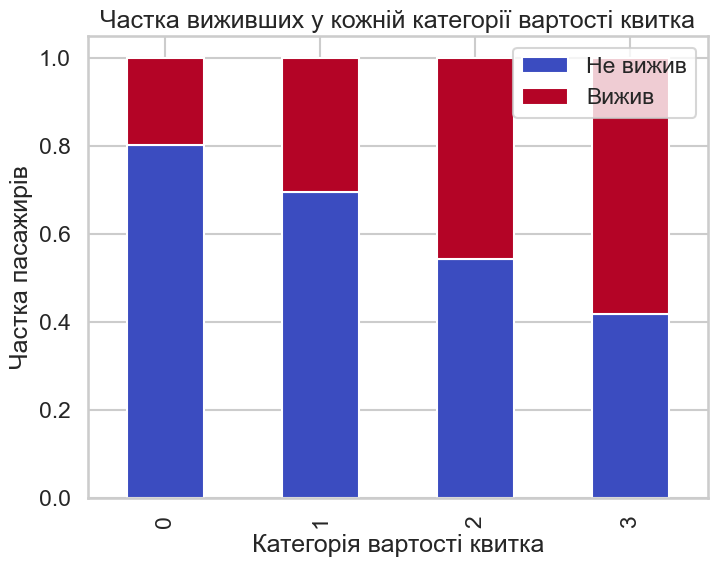

In [9]:
# Розбиття змінної "Fare" на 4 квартилі
df_filled["Fare_bin"] = pd.qcut(df_filled["Fare"], q=4, labels=[0, 1, 2, 3])

# Побудова графіка виживаності для кожного рівня "Fare_bin"
plt.figure(figsize=(8, 6))
sns.countplot(x="Fare_bin", hue="Survived", data=df_filled, palette="coolwarm")
plt.title("Кількість виживших у кожній категорії вартості квитка")
plt.xlabel("Категорія вартості квитка")
plt.ylabel("Кількість пасажирів")
plt.legend(["Не вижив", "Вижив"])
plt.show()

survival_counts = df_filled.groupby("Fare_bin")["Survived"].value_counts(normalize=True).unstack()

print("Частка виживших для кожного рівня Fare_bin:")
print(survival_counts)

survival_counts.plot(kind="bar", stacked=True, colormap="coolwarm", figsize=(8, 6))
plt.title("Частка виживших у кожній категорії вартості квитка")
plt.xlabel("Категорія вартості квитка")
plt.ylabel("Частка пасажирів")
plt.legend(["Не вижив", "Вижив"])
plt.show()


Ваші висновки:

***Завдання 7:*** Необхідно створити нові змінні ```Family_size``` та ```Alone``` та проаналізувати їх. Змінна ```Family_size``` передає суму змінних ```Parch``` та ```SibSp```. Змінна ```Family_size``` буде відібражати комбіновані дані, які необхідні для перевірки гіпотези, що ```виживання пасажирів залежіть від кількості членів їх сім'ї```. Змінна ```Alone``` позначає наявніть сім'ї.

       Family_size       Alone
count   891.000000  891.000000
mean      0.904602    0.602694
std       1.613459    0.489615
min       0.000000    0.000000
25%       0.000000    0.000000
50%       0.000000    1.000000
75%       1.000000    1.000000
max      10.000000    1.000000


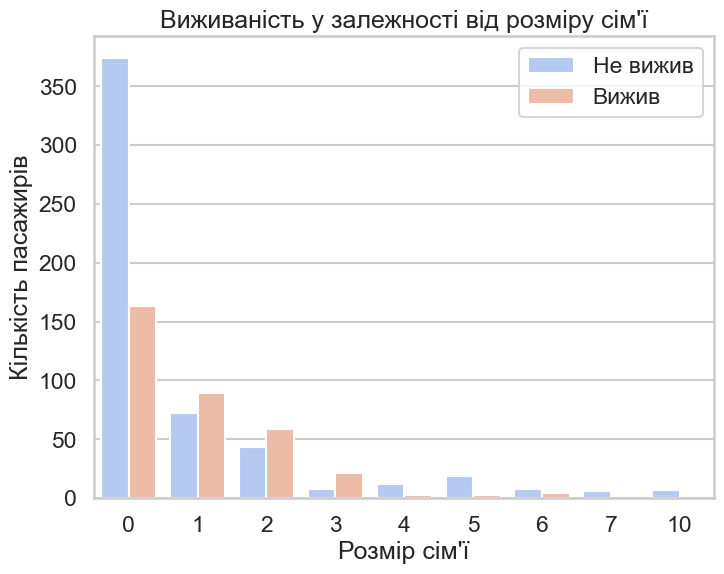

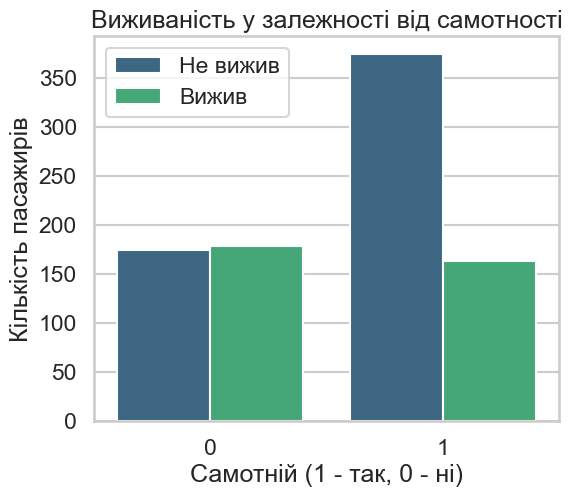

In [10]:
df_filled["Family_size"] = df_filled["Parch"] + df_filled["SibSp"]
df_filled["Alone"] = (df_filled["Family_size"] == 0).astype(int)

print(df_filled[["Family_size", "Alone"]].describe())

plt.figure(figsize=(8, 6))
sns.countplot(x="Family_size", hue="Survived", data=df_filled, palette="coolwarm")
plt.title("Виживаність у залежності від розміру сім'ї")
plt.xlabel("Розмір сім'ї")
plt.ylabel("Кількість пасажирів")
plt.legend(["Не вижив", "Вижив"])
plt.show()

plt.figure(figsize=(6, 5))
sns.countplot(x="Alone", hue="Survived", data=df_filled, palette="viridis")
plt.title("Виживаність у залежності від самотності")
plt.xlabel("Самотній (1 - так, 0 - ні)")
plt.ylabel("Кількість пасажирів")
plt.legend(["Не вижив", "Вижив"])
plt.show()


Ваші висновки:

***Завдання 8:*** Видалити атрибути які є ***НЕрелевантними*** або містять багато пропущених значень. Аргументувати свій вибір.

In [11]:
missing_values = df_filled.isnull().sum()
print("Кількість пропущених значень у кожному атрибуті:\n", missing_values)

df_cleaned = df_filled.drop(columns=["Cabin", "Ticket", "Name"])

print(df_cleaned.head())


Кількість пропущених значень у кожному атрибуті:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Age_bin          0
Fare_bin         0
Family_size      0
Alone            0
dtype: int64
   PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch     Fare  \
0            1         0       3    male  22.0      1      0   7.2500   
1            2         1       1  female  38.0      1      0  71.2833   
2            3         1       3  female  26.0      0      0   7.9250   
3            4         1       1  female  35.0      1      0  53.1000   
4            5         0       3    male  35.0      0      0   8.0500   

  Embarked Age_bin Fare_bin  Family_size  Alone  
0        S       1        0            1      0  
1        C       2        3            1      0  
2        S       1        1            0    

Ваші висновки:

***Завдання 9:*** Перетворіть змінні ```Sex```, ```Embarked``` та ```Title``` в числові значення


In [17]:

df_cleaned = df.drop(columns=["Cabin", "Ticket", "Name"]).copy()

# Перетворення змінної 'Sex' у числовий формат (0 = female, 1 = male)
df_cleaned["Sex"] = df_cleaned["Sex"].map({"male": 1, "female": 0})

# Перетворення змінної 'Embarked' у числовий формат за допомогою One-Hot Encoding
df_cleaned = pd.get_dummies(df_cleaned, columns=["Embarked"], dtype=int)

# Виділення титулів із імен (використовуємо df, бо Name вже видалено в df_cleaned)
df_cleaned["Title"] = df["Name"].str.extract(r" ([A-Za-z]+)\.", expand=False)

# Групування рідкісних титулів та перетворення в числові значення
title_mapping = {
    "Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Dr": 5, "Rev": 6, "Col": 7,
    "Major": 7, "Mlle": 2, "Mme": 3, "Don": 8, "Sir": 8, "Lady": 9, "Countess": 9,
    "Jonkheer": 9, "Capt": 7
}
df_cleaned["Title"] = df_cleaned["Title"].map(title_mapping).fillna(0).astype(int)

# Виведення перших рядків оновленого датафрейму
print(df_cleaned.head())


   PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare  \
0            1         0       3    1  22.0      1      0   7.2500   
1            2         1       1    0  38.0      1      0  71.2833   
2            3         1       3    0  26.0      0      0   7.9250   
3            4         1       1    0  35.0      1      0  53.1000   
4            5         0       3    1  35.0      0      0   8.0500   

   Embarked_C  Embarked_Q  Embarked_S  Title  
0           0           0           1      1  
1           1           0           0      3  
2           0           0           1      2  
3           0           0           1      3  
4           0           0           1      1  


Ваші висновки:

***Завдання 10.*** Побудувати графіки всіх категоріальних змінних та проаналізувати скільки кожна категорія містить даних

1.   виділити категоріальні змінні 
2.   побудувати сітку графіків кількості спотрережень по кожній категорії



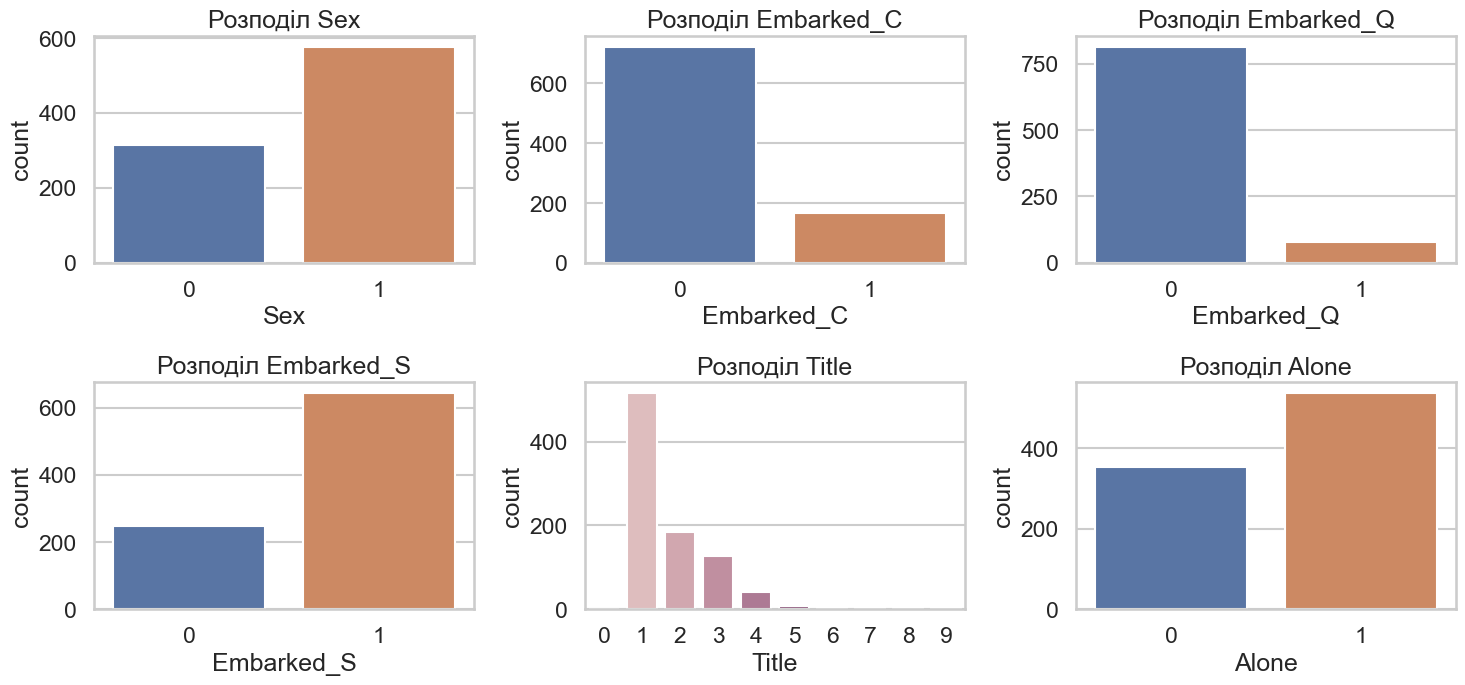

In [12]:
df_cleaned = df.drop(columns=["Cabin", "Ticket", "Name"]).copy()

# Створення змінних Family_size та Alone
df_cleaned["Family_size"] = df_cleaned["SibSp"] + df_cleaned["Parch"]
df_cleaned["Alone"] = (df_cleaned["Family_size"] == 0).astype(int)

# Перетворення категоріальних змінних
df_cleaned["Sex"] = df_cleaned["Sex"].map({"male": 1, "female": 0})
df_cleaned = pd.get_dummies(df_cleaned, columns=["Embarked"], dtype=int)

# Виділення титулів
df_cleaned["Title"] = df["Name"].str.extract(r" ([A-Za-z]+)\.", expand=False)
title_mapping = {
    "Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Dr": 5, "Rev": 6, "Col": 7,
    "Major": 7, "Mlle": 2, "Mme": 3, "Don": 8, "Sir": 8, "Lady": 9, "Countess": 9,
    "Jonkheer": 9, "Capt": 7
}
df_cleaned["Title"] = df_cleaned["Title"].map(title_mapping).fillna(0).astype(int)

# Визначення категоріальних змінних
categorical_cols = ["Sex", "Embarked_C", "Embarked_Q", "Embarked_S", "Title", "Alone"]

# Побудова графіків
fig, axes = plt.subplots(nrows=len(categorical_cols)//3 + 1, ncols=3, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(data=df_cleaned, x=col, hue=col, legend=False, ax=axes[i])
    axes[i].set_title(f"Розподіл {col}")

# Видалення порожніх підграфіків
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Ваші висновки:

***Завдання 11.*** Побудувати діаграми розподілу всіх числових змінних

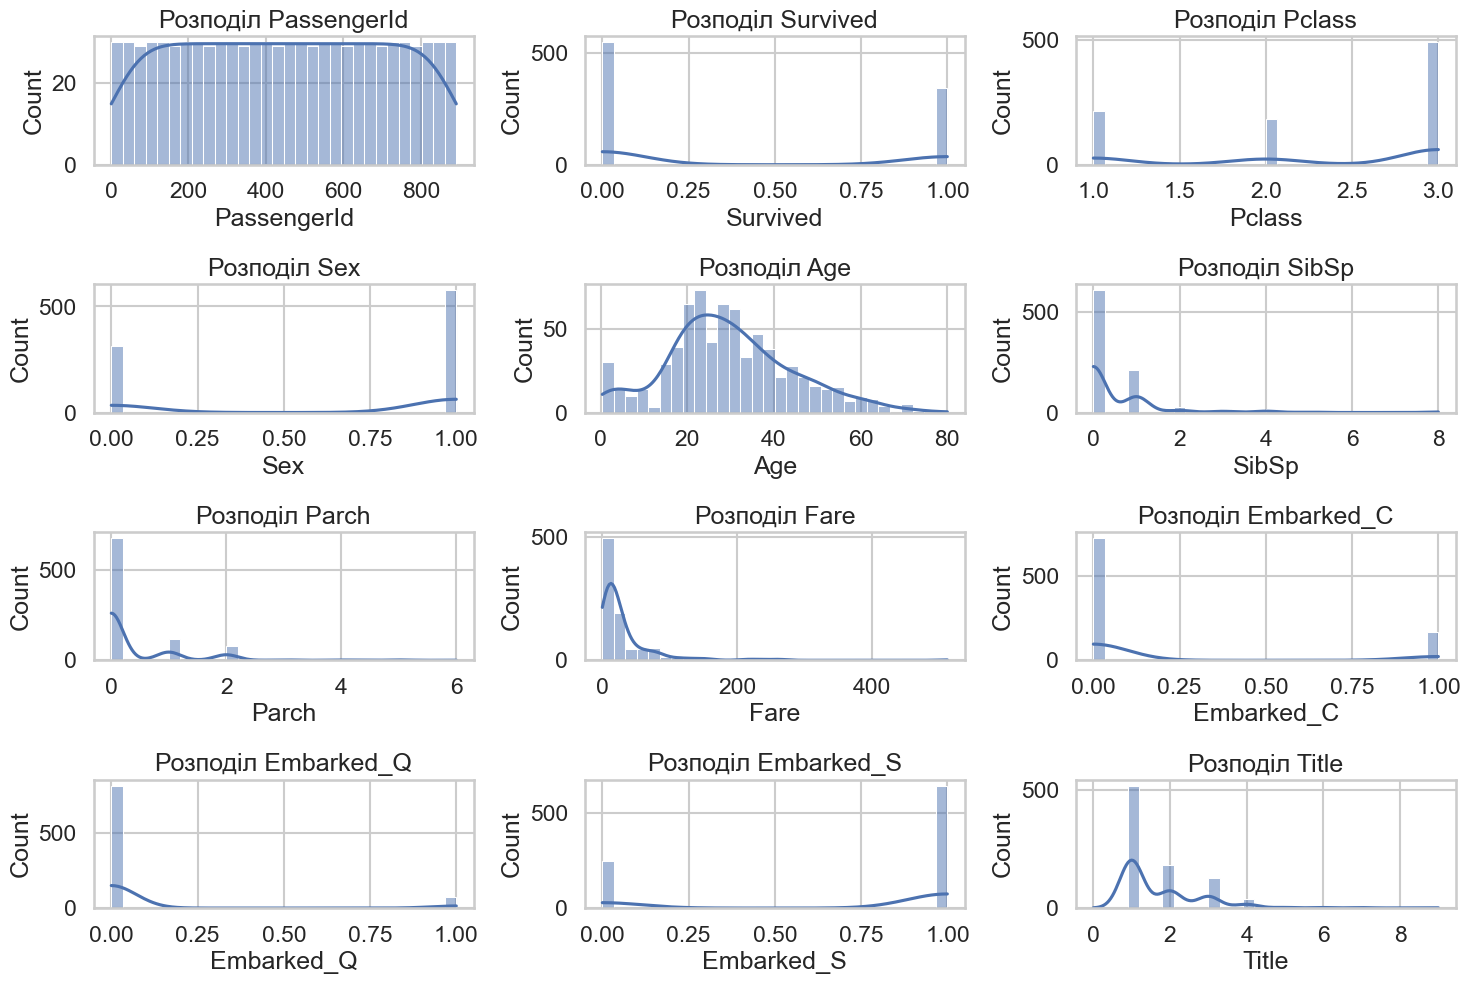

In [18]:
# Визначаємо числові змінні
numeric_cols = df_cleaned.select_dtypes(include=['int64', 'float64']).columns

# Побудова гістограм для кожної числової змінної
fig, axes = plt.subplots(nrows=len(numeric_cols)//3 + 1, ncols=3, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.histplot(df_cleaned[col], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f"Розподіл {col}")

# Видалення зайвих підграфіків
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Ваші висновки:

##Співвіднонешшя між всіма числовими змінними 
  
***Завдання 12.*** В деяких випадках візуалізація співвідношення між змінними (числовими, категоріальними) дає можливість побачити викиди в змінних та знайти приховані тенденції і виділити навіть додаткові змінні. Тому, необхідно:
1) побудувати графіки співвідношення між всіма числовими змінними.  
2) описати отримані співвідношення і запропонувати як їх можна (чи не можна) використати

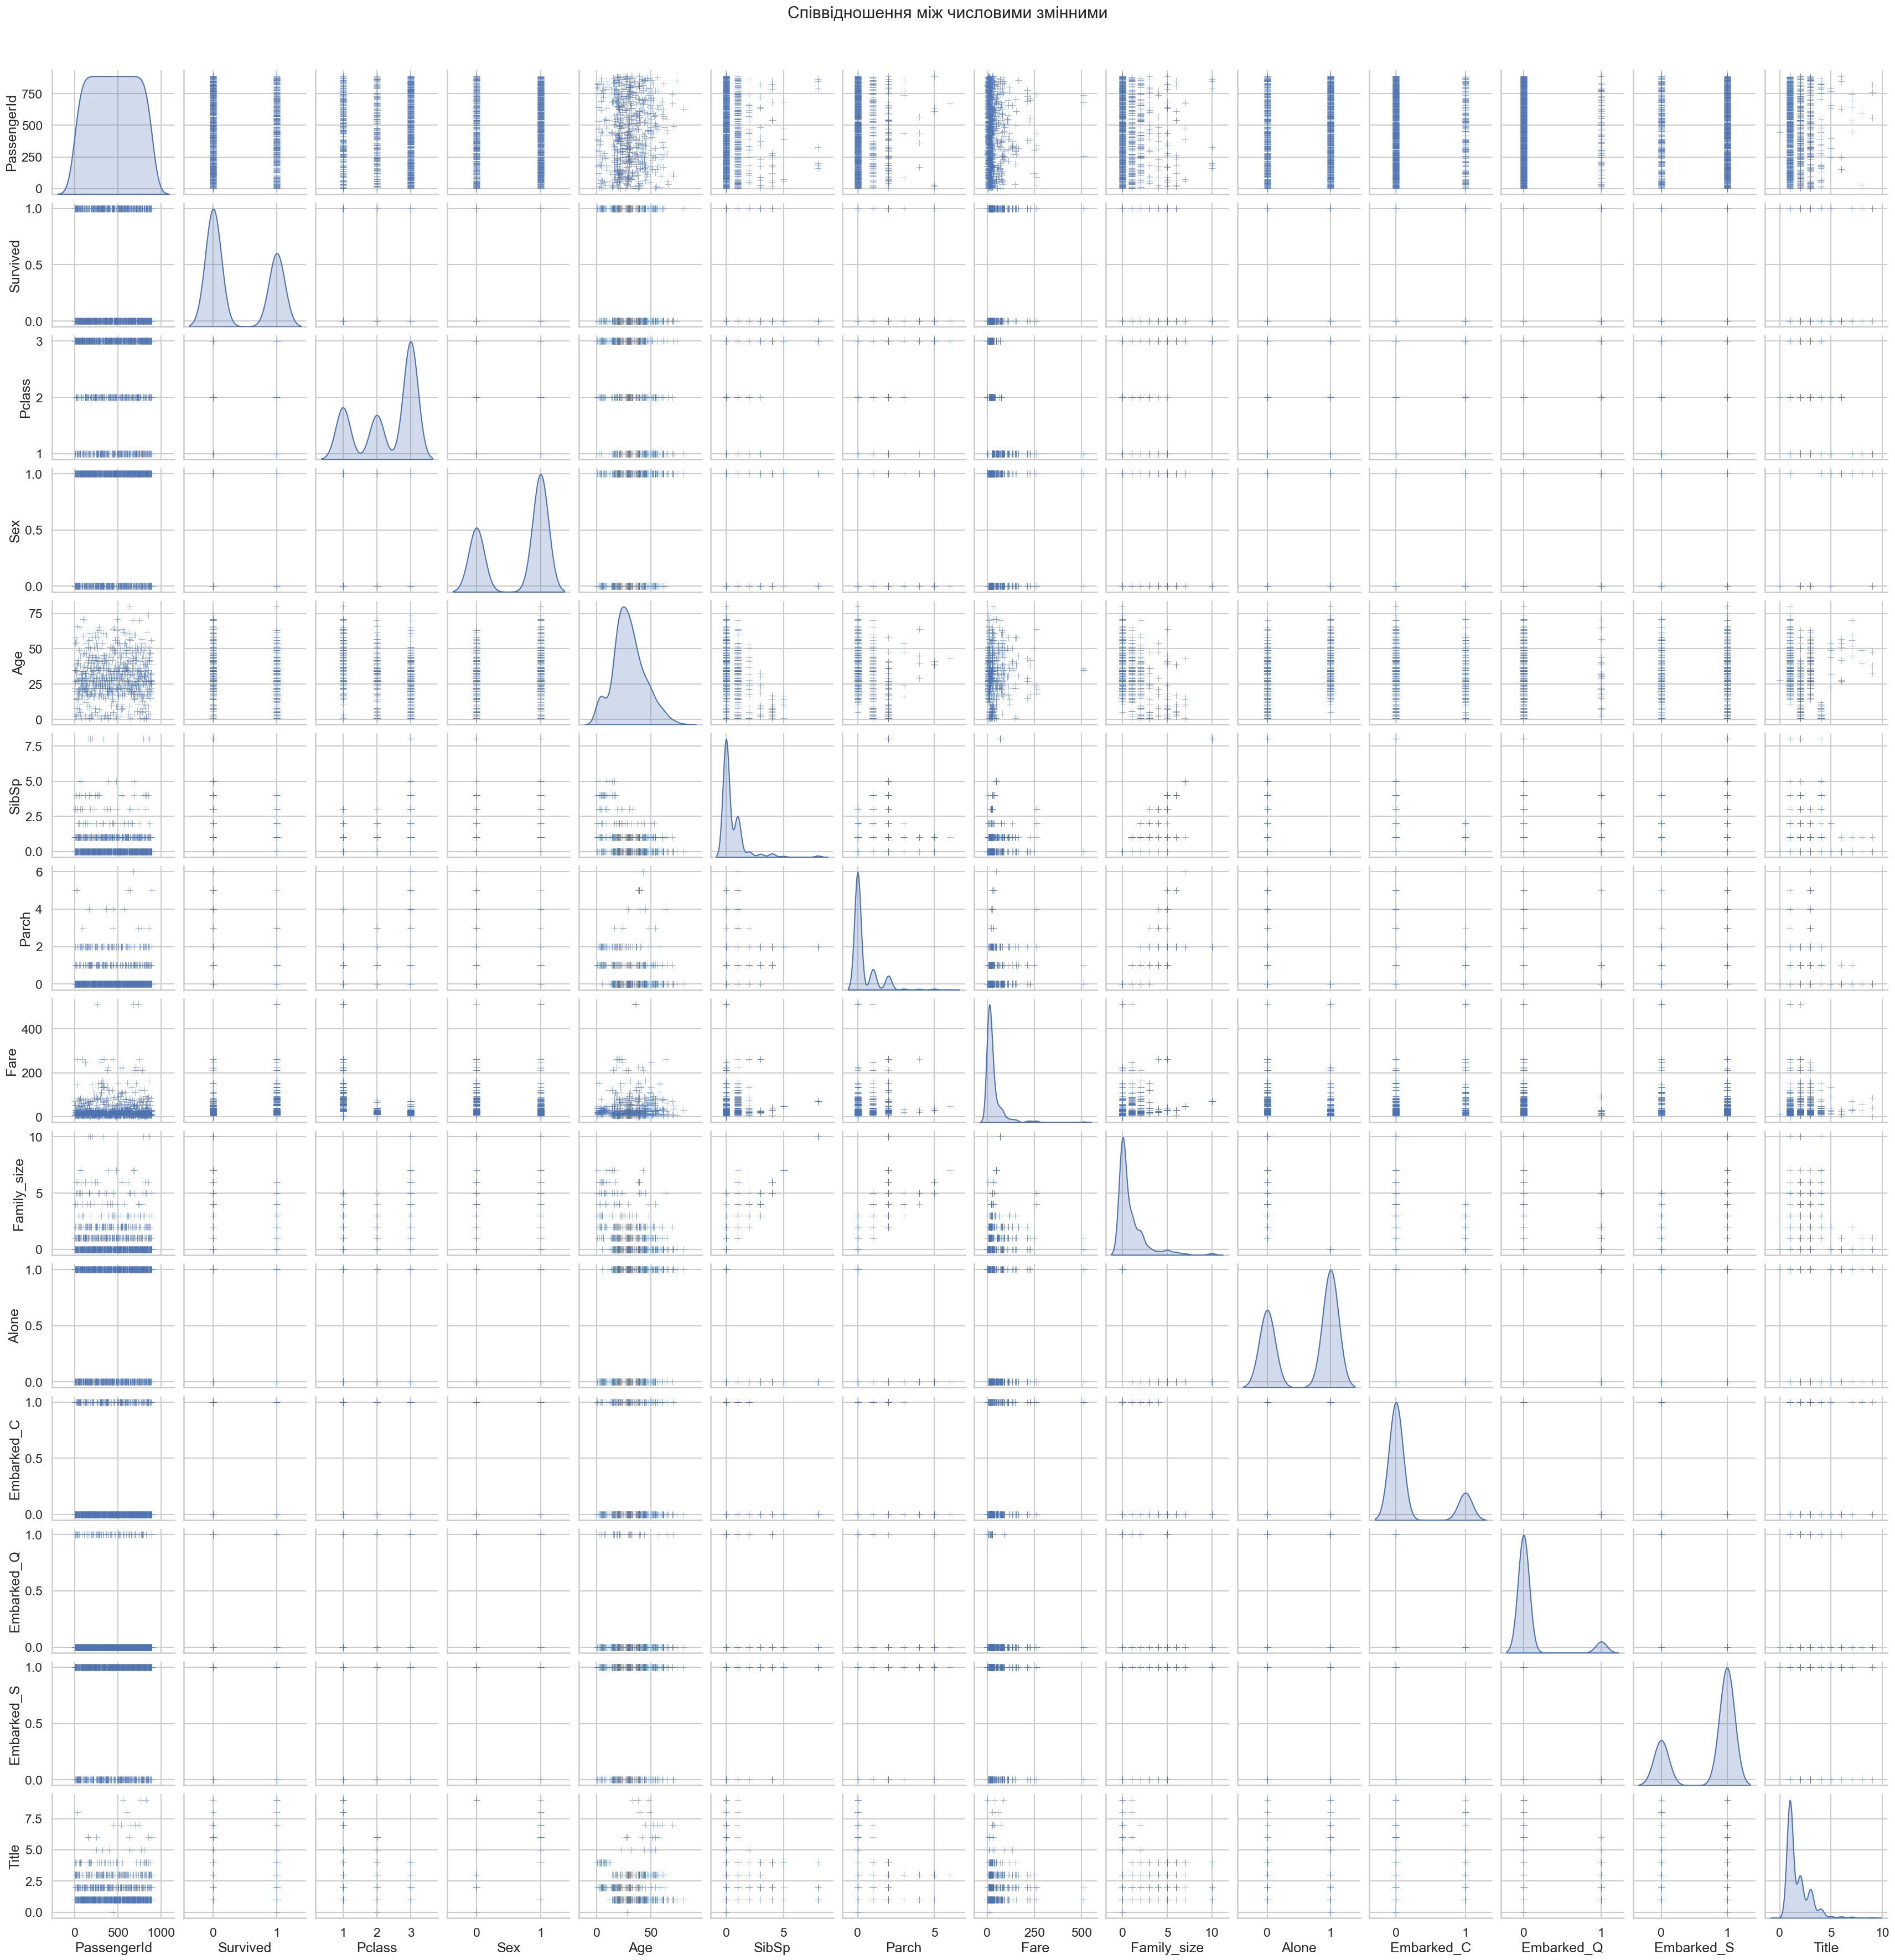

In [14]:
sns.pairplot(df_cleaned, diag_kind='kde', markers='+', plot_kws={'alpha': 0.5})
plt.suptitle("Співвідношення між числовими змінними", y=1.02)
plt.show()

Ваші висновки:

Кожне правильно виконане завдання буде оцінюватись в ```2 бали```.